# data_p_sub.csv

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data-p3/dat_P_sub_c.csv")

In [5]:
with pd.option_context('display.max_columns', None):
    print(df.head())

   Pass_ID  valid_P_ID Airfield               S2  Wait_Time  C_Start  C0  \
0  5348206           1      AUC  2028-09-01 6:37        NaN        1   1   
1  5348209           1      AUC  2028-09-01 6:38        NaN        1   1   
2  5348216           1      AUC  2028-09-01 6:39        NaN        1   1   
3  5348224           1      AUC  2028-09-01 6:39        NaN        1   1   
4  5348225           1      AUC  2028-09-01 6:40        NaN        1   1   

   C_avg    Sch_Departure    Act_Departure BFO_Dest_City  \
0    1.0  2028-09-01 8:06  2028-09-01 8:06        BORQUE   
1    1.0  2028-09-01 8:06  2028-09-01 8:06        BORQUE   
2    1.0  2028-09-01 8:06  2028-09-01 8:06        BORQUE   
3    1.0  2028-09-01 8:06  2028-09-01 8:06        BORQUE   
4    1.0  2028-09-01 8:06  2028-09-01 8:06        BORQUE   

  BFO_Destination_Country_Code    order Departure_Date  Time_of_Day  \
0                          BOR  5374650     2028-09-01  2 - MORNING   
1                          BOR  5374657 

In [20]:
df.dtypes

Pass_ID                           int64
valid_P_ID                        int64
Airfield                         object
S2                               object
Wait_Time                       float64
C_Start                           int64
C0                                int64
C_avg                           float64
Sch_Departure                    object
Act_Departure                    object
BFO_Dest_City                    object
BFO_Destination_Country_Code     object
order                             int64
Departure_Date                   object
Time_of_Day                      object
Period_of_Week                   object
Day_of_Week                      object
Month                            object
Season                           object
Year                              int64
WT_flag                           int64
S2_Sch_Flag                       int64
S2_Act_Flag                       int64
Sch_Act_Flag                      int64
Flight_ID                         int64


In [ ]:
low_cardinality_int_cols = [col for col in df.select_dtypes(include=['int']).columns if df[col].nunique() < 10]
object_cols = df.select_dtypes(include=['object']).columns.tolist()
high_cardinality_int_cols = [col for col in df.select_dtypes(include=['int']).columns if df[col].nunique() >= 10]
continuous_cols = df.select_dtypes(include=['float']).columns.tolist()

dtypes = {
    "Column": [],
    "Type": [],
    "Unique Values / Range": []
}

for col in low_cardinality_int_cols + object_cols:
    unique_vals = df[col].unique()
    dtypes["Column"].append(col)
    dtypes["Type"].append("Low Cardinality Integer" if col in low_cardinality_int_cols else "Object")
    dtypes["Unique Values / Range"].append(unique_vals)

for col in high_cardinality_int_cols + continuous_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    dtypes["Column"].append(col)
    dtypes["Type"].append("High Cardinality Integer" if col in high_cardinality_int_cols else "Continuous")
    dtypes["Unique Values / Range"].append((min_val, max_val))

df_dtypes = pd.DataFrame(dtypes)
df_dtypes

,Column,Type,Unique Values / Range
0,valid_P_ID,Low Cardinality Integer,[1]
1,C_Start,Low Cardinality Integer,"[1, 2, 3]"
2,C0,Low Cardinality Integer,"[1, 2, 3]"
3,Year,Low Cardinality Integer,[2028]
4,WT_flag,Low Cardinality Integer,"[1, 0]"
5,S2_Sch_Flag,Low Cardinality Integer,"[0, 1]"
6,S2_Act_Flag,Low Cardinality Integer,"[0, 1]"
7,Sch_Act_Flag,Low Cardinality Integer,"[0, 1]"
8,Airfield,Object,[AUC]
9,S2,Object,"[2028-09-01 6:37, 2028-09-01 6:38, 2028-09-01 ..."


In [22]:
for i in df.columns:
    print(f"| {i} | | | | |")

| Pass_ID | | | | |
| valid_P_ID | | | | |
| Airfield | | | | |
| S2 | | | | |
| Wait_Time | | | | |
| C_Start | | | | |
| C0 | | | | |
| C_avg | | | | |
| Sch_Departure | | | | |
| Act_Departure | | | | |
| BFO_Dest_City | | | | |
| BFO_Destination_Country_Code | | | | |
| order | | | | |
| Departure_Date | | | | |
| Time_of_Day | | | | |
| Period_of_Week | | | | |
| Day_of_Week | | | | |
| Month | | | | |
| Season | | | | |
| Year | | | | |
| WT_flag | | | | |
| S2_Sch_Flag | | | | |
| S2_Act_Flag | | | | |
| Sch_Act_Flag | | | | |
| Flight_ID | | | | |
| Delay_in_Seconds | | | | |


| Field    | Type | Format | Range | Description
| --- | --- | --- | --- | --- |
| Pass_ID | | | | |
| valid_P_ID | | | | |
| Airfield | | | | |
| S2 | | | | |
| Wait_Time | | | | |
| C_Start | | | | |
| C0 | | | | |
| C_avg | | | | |
| Sch_Departure | | | | |
| Act_Departure | | | | |
| BFO_Dest_City | | | | |
| BFO_Destination_Country_Code | | | | |
| order | | | | |
| Departure_Date | | | | |
| Time_of_Day | | | | |
| Period_of_Week | | | | |
| Day_of_Week | | | | |
| Month | | | | |
| Season | | | | |
| Year | | | | |
| WT_flag | | | | |
| S2_Sch_Flag | | | | |
| S2_Act_Flag | | | | |
| Sch_Act_Flag | | | | |
| Flight_ID | | | | |
| Delay_in_Seconds | | | | |

In [14]:
df['WT_flag'].unique()

array([1, 0], dtype=int64)

In [8]:
df["C_Start"].unique()

array([1, 2, 3], dtype=int64)

In [9]:
df["C0"].unique()

array([1, 2, 3], dtype=int64)

In [10]:
df["C_avg"].unique()

array([1.        , 2.        , 1.5       , 0.5       , 1.33333333,
       1.2       , 1.66666667, 2.33333333, 2.5       , 2.66666667,
       3.        , 1.75      , 0.75      ])

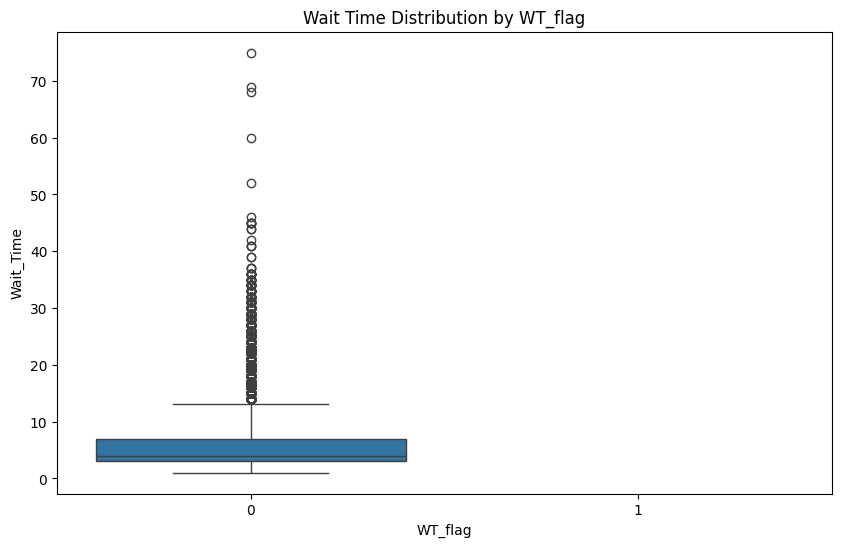

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='WT_flag', y='Wait_Time', data=df)
plt.title("Wait Time Distribution by WT_flag")
plt.xlabel("WT_flag")
plt.ylabel("Wait_Time")
plt.show()

In [33]:
df.loc[df['WT_flag'] == 1, 'Wait_Time'].unique()

array([nan])

WT_flag seems to represent if the Wait_Time variable is unique

In [30]:
# plt.figure(figsize=(12, 10))
# corr_matrix = df.select_dtypes(include=['number']).drop(columns=["valid_P_ID","Year"]).dropna().corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [29]:
df["WT_flag"].value_counts()

WT_flag
0    97261
1    16871
Name: count, dtype: int64

In [12]:
df.columns

Index(['Pass_ID', 'valid_P_ID', 'Airfield', 'S2', 'Wait_Time', 'C_Start', 'C0',
       'C_avg', 'Sch_Departure', 'Act_Departure', 'BFO_Dest_City',
       'BFO_Destination_Country_Code', 'order', 'Departure_Date',
       'Time_of_Day', 'Period_of_Week', 'Day_of_Week', 'Month', 'Season',
       'Year', 'WT_flag', 'S2_Sch_Flag', 'S2_Act_Flag', 'Sch_Act_Flag',
       'Flight_ID', 'Delay_in_Seconds'],
      dtype='object')

Pass_ID                           int64
valid_P_ID                        int64
Airfield                         object
S2                               object
Wait_Time                       float64
C_Start                           int64
C0                                int64
C_avg                           float64
Sch_Departure                    object
Act_Departure                    object
BFO_Dest_City                    object
BFO_Destination_Country_Code     object
order                             int64
Departure_Date                   object
Time_of_Day                      object
Period_of_Week                   object
Day_of_Week                      object
Month                            object
Season                           object
Year                              int64
WT_flag                           int64
S2_Sch_Flag                       int64
S2_Act_Flag                       int64
Sch_Act_Flag                      int64
Flight_ID                         int64


In [18]:
# def convert_to_datetime(df):
#     converted_columns = []
#     for col in df.columns:
#         try:
#             df[col] = pd.to_datetime(df[col], errors='raise')
#             converted_columns.append(col)
#         except (ValueError, TypeError):
#             pass
#     print("Converted columns:", converted_columns)
#     return df

# df = convert_to_datetime(df)

In [8]:
df["Airfield"].value_counts()

Airfield
AUC    114132
Name: count, dtype: int64

only one airfield? weird

In [9]:
df['S2'].value_counts()

S2
2028-11-25 18:34    10
2028-12-29 17:30    10
2028-12-30 18:51     9
2028-12-23 8:01      9
2028-11-12 17:19     9
                    ..
2028-10-24 12:51     1
2028-10-24 13:40     1
2028-10-24 13:45     1
2028-10-24 13:47     1
2028-12-31 19:21     1
Name: count, Length: 63179, dtype: int64

In [10]:
df['Sch_Departure'].value_counts()

Sch_Departure
2028-10-28 19:46    229
2028-11-04 18:46    220
2028-11-11 19:46    209
2028-11-21 9:51     166
2028-12-27 12:36    159
                   ... 
2028-09-12 12:36      1
2028-11-18 14:31      1
2028-11-18 16:06      1
2028-09-02 12:16      1
2028-12-20 20:46      1
Name: count, Length: 3433, dtype: int64